In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

In [6]:
COLD_BP = 60
HOT_BP = 72
LOADSHAPE_DAYS_TO_AVERAGE = 50

SEISMIC_RED = '#880000'
SEISMIC_BLUE = '#000088'
SEISMIC_GREEN = '#008800'

POWERWALL_DAYSINCEBEGINNING = [604, 605, 607, 608, 610, 638, 642, 643,
       664, 665, 670, 672, 706, 707, 721, 722, 726, 728, 742, 749, 751, 765, 770, 776, 785]

POWERWALL_COLD = [742, 749, 751, 765, 770, 776, 785]
POWERWALL_HOT = [604, 605, 607, 608, 610, 638, 642, 643,
       664, 665, 670, 672]
POWERWALL_SHOULDER = [706, 707, 721, 722, 726, 728]
POWERWALL_DISCHARGE_HOURS = [0,1,2,3,4,5,6,7,8,16,17,18,19,20,21,22,23]

In [7]:
# import data
raw_df = pd.read_csv('../produced_data_files/final_data_for_viz_thru_2018.csv')
raw_df['pandas_dt'] = raw_df['datetime'].apply(lambda x: pd.to_datetime(x))
raw_df['dayofweek'] = raw_df['pandas_dt'].apply(lambda x: x.dayofweek)
raw_df['weekdayQ'] = np.where(raw_df['dayofweek'] < 5, 1, 0)
raw_df['hdd'] = np.where(raw_df['Dry-bulb (F)'] < COLD_BP, (COLD_BP - raw_df['Dry-bulb (F)']) / 96.0, 0)
raw_df['cdd'] = np.where(raw_df['Dry-bulb (F)'] > HOT_BP, (raw_df['Dry-bulb (F)'] - HOT_BP) / 96.0, 0)
raw_df['total_dd'] = raw_df['hdd'] + raw_df['cdd']
raw_df['powerwall_discharge'] = np.where(np.all([raw_df['daysincebeginning'].isin(POWERWALL_DAYSINCEBEGINNING), raw_df['net_power_kW'] > 4, raw_df['hour'].isin(POWERWALL_DISCHARGE_HOURS)], axis=0),1,0)
raw_df[raw_df['powerwall_discharge']==1]

,Unnamed: 0,IntervalEnd,Interconnect_kWh,N01_kWh,NGEN_kWh,datetime,hour,minute,hourofday,dayofmonth,...,Wood_m,Oil_m,Other_m,pandas_dt,dayofweek,weekdayQ,hdd,cdd,total_dd,powerwall_discharge
52098,52098,2018-06-29-18:45:00,NaN,0.00,1.21,2018-06-29 18:45:00,18,45,18.75,29,...,0,0,0,2018-06-29 18:45:00,4,1,0.000000,0.125000,0.125000,1
52099,52099,2018-06-29-19:00:00,NaN,0.00,1.18,2018-06-29 19:00:00,19,0,19.00,29,...,0,0,0,2018-06-29 19:00:00,4,1,0.000000,0.128229,0.128229,1
52100,52100,2018-06-29-19:15:00,NaN,0.00,1.15,2018-06-29 19:15:00,19,15,19.25,29,...,0,0,0,2018-06-29 19:15:00,4,1,0.000000,0.136302,0.136302,1
52101,52101,2018-06-29-19:30:00,NaN,0.00,1.15,2018-06-29 19:30:00,19,30,19.50,29,...,0,0,0,2018-06-29 19:30:00,4,1,0.000000,0.144375,0.144375,1
52102,52102,2018-06-29-19:45:00,NaN,0.00,1.14,2018-06-29 19:45:00,19,45,19.75,29,...,0,0,0,2018-06-29 19:45:00,4,1,0.000000,0.152448,0.152448,1
52103,52103,2018-06-29-20:00:00,NaN,0.00,1.14,2018-06-29 20:00:00,20,0,20.00,29,...,0,0,0,2018-06-29 20:00:00,4,1,0.000000,0.157292,0.157292,1
52104,52104,2018-06-29-20:15:00,NaN,0.00,1.09,2018-06-29 20:15:00,20,15,20.25,29,...,0,0,0,2018-06-29 20:15:00,4,1,0.000000,0.157292,0.157292,1
52105,52105,2018-06-29-20:30:00,NaN,0.00,1.06,2018-06-29 20:30:00,20,30,20.50,29,...,0,0,0,2018-06-29 20:30:00,4,1,0.000000,0.157292,0.157292,1
52106,52106,2018-06-29-20:45:00,NaN,0.00,1.09,2018-06-29 20:45:00,20,45,20.75,29,...,0,0,0,2018-06-29 20:45:00,4,1,0.000000,0.157292,0.157292,1
52107,52107,2018-06-29-21:00:00,NaN,0.00,1.14,2018-06-29 21:00:00,21,0,21.00,29,...,0,0,0,2018-06-29 21:00:00,4,1,0.000000,0.157292,0.157292,1


In [43]:
# get a list of daily stats by daysincebeginning
DUCK_MORNING = [4,5,6,7,8,9]
DUCK_MIDDAY = [11,12,13,14,15]
DUCK_EVENING = [17,18,19,20,21]

def find_duck_midday_valley(x):
    return x[x['hour'].isin(DUCK_MIDDAY)]['net_power_kW'].sum() / 4.0

def find_duck_sunset_peak(x):
    return x[x['hour'].isin(DUCK_EVENING)]['net_power_kW'].sum() / 4.0

def find_daily_duck_factor(x):
    return find_duck_midday_valley(x) - find_duck_sunset_peak(x) 

raw_df[['hour', 'net_power_kW', 'daysincebeginning']].groupby('daysincebeginning').agg(find_daily_duck_factor)

,hour,net_power_kW
daysincebeginning,,
60,11.45,11.45
61,7.40,7.40
62,1.55,1.55
63,7.68,7.68
64,-3.81,-3.81
65,12.35,12.35
66,9.04,9.04
67,6.21,6.21
68,4.88,4.88


In [8]:
# make plot 1 - average loadshape by temperature

# part a: find the x coldest weekdays, x hottest weekdays, and x shoulderiest weekdays
weekday_df = raw_df[raw_df['weekdayQ']==1]
daily_df = weekday_df[['daysincebeginning', 'Dry-bulb (F)', 'total_dd']].groupby('daysincebeginning').mean().reset_index()
cold_days = list(daily_df.sort_values('Dry-bulb (F)')['daysincebeginning'].iloc[:LOADSHAPE_DAYS_TO_AVERAGE])
hot_days = list(daily_df.sort_values('Dry-bulb (F)', ascending=False)['daysincebeginning'].iloc[:LOADSHAPE_DAYS_TO_AVERAGE])
shoulder_days = list(daily_df.sort_values('total_dd')['daysincebeginning'].iloc[:LOADSHAPE_DAYS_TO_AVERAGE])


5
5.493644858041448
6.243286883408654
7.455104488001181
8.852522062506448
10.68521424614202
12.64674781480897
14.81326230452557
16.704439663395767
18.33647407506539
19.291728909279254
19.67462405481891


(4.0, 21.0, -0.1, 6.5)

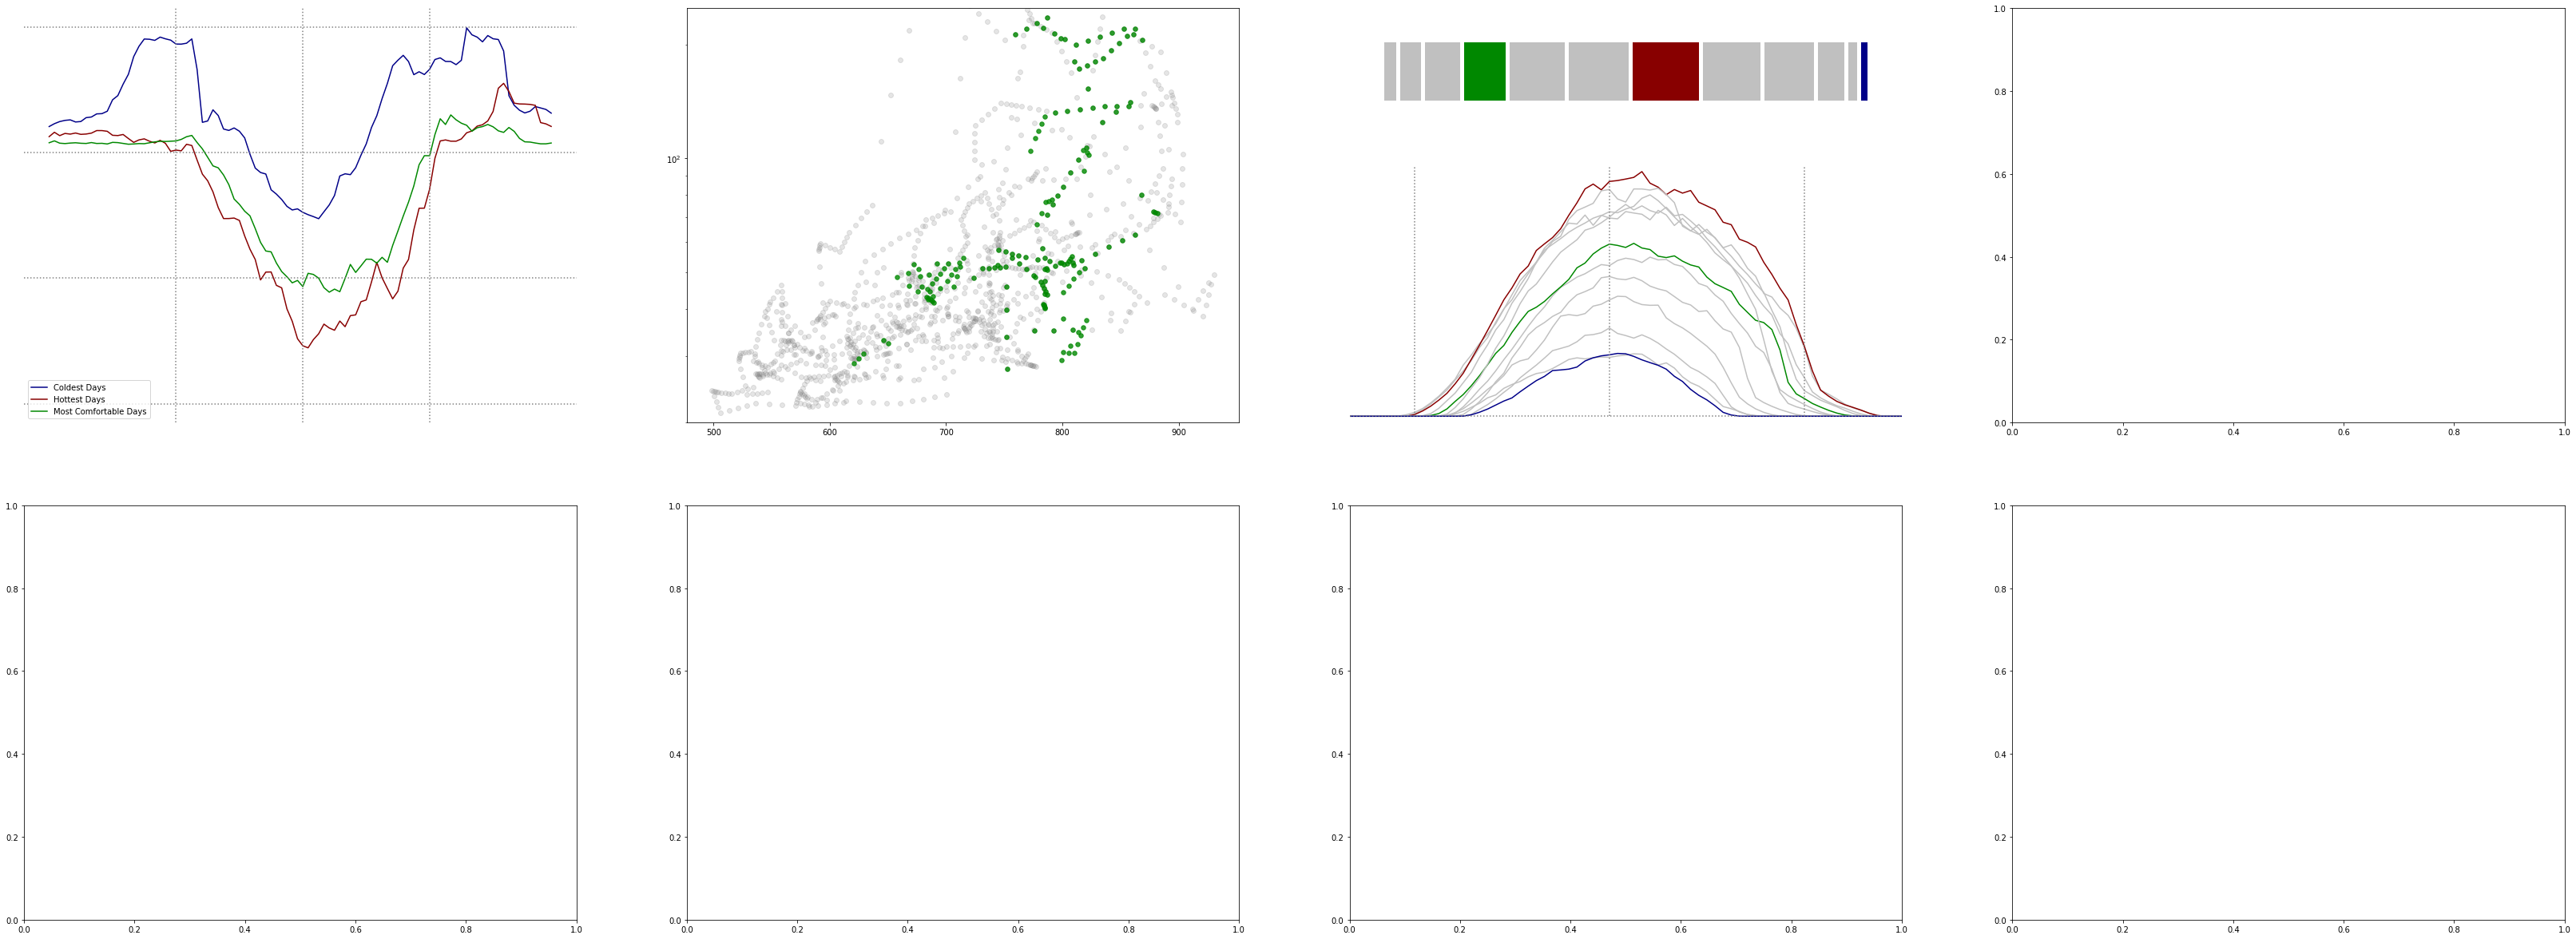

In [9]:
fig, axarr = plt.subplots(2, 4,
                         sharex=False,
                         sharey=False,
                         figsize=(57,21),
                         gridspec_kw = {'height_ratios': [1, 1],
                                       'width_ratios': [1, 1, 1, 1]})

# top left - average net loadshapes by temperature
# make avg loadshapes and plot them
colors = [SEISMIC_BLUE, SEISMIC_RED, SEISMIC_GREEN]
labels = ['Coldest Days', 'Hottest Days', 'Most Comfortable Days']
handles = []
for n, day_group in enumerate([cold_days, hot_days, shoulder_days]):
    dates_df = weekday_df[weekday_df['daysincebeginning'].isin(day_group)]
    new_df = dates_df[['hourofday', 'net_power_kW']].groupby('hourofday').agg('mean').reset_index()
    axarr[0,0].plot(new_df['hourofday'], -new_df['net_power_kW'], color=colors[n])
    handles.append(mlines.Line2D([],[], color=colors[n], label=labels[n]))

# plot 0,0 aesthetics
axarr[0,0].legend(handles=handles, loc='lower left')
axarr[0,0].axis('off')
for vert in [6,12,18]:
    axarr[0,0].axvline(x=vert, color='gray', linestyle=':')
for hori in [2,0,-2,-4]:
    axarr[0,0].axhline(y=hori, color='gray', linestyle=':')
    
# since powerwall install df
since_pow_df = raw_df[(raw_df['daysincebeginning'] > 600)&(raw_df['RT_LMP'] > 1)]
#axarr[0,1].scatter(since_pow_df['RT_Demand'], since_pow_df['RT_LMP'], color='silver', alpha=0.01)
pow_days_df = raw_df[(raw_df['daysincebeginning'] > 600)&(raw_df['RT_LMP'] > 1)&(raw_df['daysincebeginning'].isin(POWERWALL_HOT))]
axarr[0,1].scatter(pow_days_df['RT_Demand'], pow_days_df['RT_LMP'], color='gray', alpha=0.2)
powerwall_active_df = since_pow_df[since_pow_df['powerwall_discharge']==1]
axarr[0,1].scatter(powerwall_active_df['RT_Demand'], powerwall_active_df['RT_LMP'], color=SEISMIC_GREEN, alpha=0.8, s=30)
axarr[0,1].set_ylim(20,250)
axarr[0,1].set_yscale('log')

# solar loadshape and bars
last_two_years_df = raw_df[raw_df['year'] > 2016]
months_df = last_two_years_df[['hourofday', 'month', 'solaredge_kW']].groupby(['month', 'hourofday']).agg('mean').reset_index()
left = 5
scaling_factor = 1 / (months_df['solaredge_kW'].sum() / 15.0)
for m in np.arange(1,13):
    sub_df = months_df[months_df['month']==m]
    bar_chunk = scaling_factor * sub_df['solaredge_kW'].sum()
    if m == 12:
        color = SEISMIC_BLUE
    elif m == 7:
        color = SEISMIC_RED
    elif m == 4:
        color = SEISMIC_GREEN
    else:
        color = 'silver'
    axarr[0,2].plot(sub_df['hourofday'], sub_df['solaredge_kW'], color=color)
    axarr[0,2].barh(5.5, width=scaling_factor * sub_df['solaredge_kW'].sum(), height=1, left=left, color=color, 
                    edgecolor='white', linewidth=5)
    print(left)
    left += bar_chunk
    
axarr[0,2].set_xlim(4, 21)
axarr[0,2].set_ylim(-0.1, 6.5)
for vert in [6,12,18]:
    axarr[0,2].plot( [vert, vert], [0,4], color='gray', linestyle=':')
axarr[0,2].axhline(0, color='gray', linestyle=':')
axarr[0,2].axis('off')


In [12]:
# trash
daily_stats_df = raw_df.groupby

,Unnamed: 0,IntervalEnd,Interconnect_kWh,N01_kWh,NGEN_kWh,datetime,hour,minute,hourofday,dayofmonth,...,rolling_sum,credit,plot_hour,pandas_dt,dayofweek,weekdayQ,hdd,cdd,total_dd,powerwall_discharge
0,0,2016-11-01-00:15:00,0.0,0.02,0.0,2016-11-01 00:15:00,0,15,0.25,1,...,-0.02,0.0,0.25,2016-11-01 00:15:00,1,1,0.218750,0.0,0.218750,0
1,1,2016-11-01-00:30:00,0.0,0.03,0.0,2016-11-01 00:30:00,0,30,0.50,1,...,-0.05,0.0,0.50,2016-11-01 00:30:00,1,1,0.218750,0.0,0.218750,0
2,2,2016-11-01-00:45:00,0.0,0.05,0.0,2016-11-01 00:45:00,0,45,0.75,1,...,-0.10,0.0,0.75,2016-11-01 00:45:00,1,1,0.218750,0.0,0.218750,0
3,3,2016-11-01-01:00:00,0.0,0.03,0.0,2016-11-01 01:00:00,1,0,1.00,1,...,-0.13,0.0,1.00,2016-11-01 01:00:00,1,1,0.219896,0.0,0.219896,0
4,4,2016-11-01-01:15:00,0.0,0.02,0.0,2016-11-01 01:15:00,1,15,1.25,1,...,-0.15,0.0,1.25,2016-11-01 01:15:00,1,1,0.222760,0.0,0.222760,0


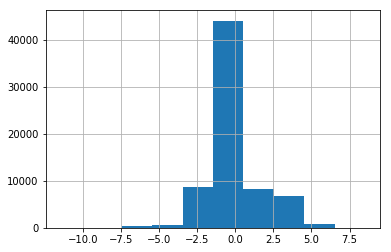

In [11]:
raw_df['net_power_kW'].hist()

In [104]:
# trash
test_powerwall_df = raw_df[(raw_df['net_power_kW'] > 4)&(raw_df['net_power_kW'] > 6 * raw_df['solaredge_kW'])]
prospective_powerwall_dates = test_powerwall_df['daysincebeginning'].unique()
set(POWERWALL_DAYSINCEBEGINNING) - set(prospective_powerwall_dates), set(prospective_powerwall_dates) - set(POWERWALL_DAYSINCEBEGINNING)

({670, 726}, {649, 650, 651, 662, 666, 674, 680, 689})

In [91]:

for day in prospective_powerwall_dates:
    fig, ax = plt.subplots(figsize=(10,8))
    sub_df = raw_df[raw_df['daysincebeginning'] == day]
    ax.plot(sub_df['hourofday'], sub_df['net_power_kW'])
    ax.text(0.1, 0.1, f"date: {sub_df['datetime'].iloc[0]}")
    fig.savefig(f"day_{day}.png")
    plt.close('all')

In [92]:
raw_df.tail()

,Unnamed: 0,IntervalEnd,Interconnect_kWh,N01_kWh,NGEN_kWh,datetime,hour,minute,hourofday,dayofmonth,...,net_power_kW,rolling_sum,credit,plot_hour,pandas_dt,dayofweek,weekdayQ,hdd,cdd,total_dd
75730,75730,2018-12-31-22:45:00,NaN,0.04,0.0,2018-12-31 22:45:00,22,45,22.75,31,...,-0.16,710.945,0.0,22.75,2018-12-31 22:45:00,0,1,0.222554,0.0,0.222554
75731,75731,2018-12-31-23:00:00,NaN,0.07,0.0,2018-12-31 23:00:00,23,0,23.00,31,...,-0.28,710.875,0.0,23.00,2018-12-31 23:00:00,0,1,0.221793,0.0,0.221793
75732,75732,2018-12-31-23:15:00,NaN,0.07,0.0,2018-12-31 23:15:00,23,15,23.25,31,...,-0.28,710.805,0.0,23.25,2018-12-31 23:15:00,0,1,0.221032,0.0,0.221032
75733,75733,2018-12-31-23:30:00,NaN,0.08,0.0,2018-12-31 23:30:00,23,30,23.50,31,...,-0.32,710.725,0.0,23.50,2018-12-31 23:30:00,0,1,0.220272,0.0,0.220272
75734,75734,2018-12-31-23:45:00,NaN,0.06,0.0,2018-12-31 23:45:00,23,45,23.75,31,...,-0.24,710.665,0.0,23.75,2018-12-31 23:45:00,0,1,0.219511,0.0,0.219511


In [93]:
prospective_powerwall_dates

array([ 88, 126, 175, 185, 186, 203, 210, 211, 212, 229, 230, 231, 235,
       236, 249, 280, 295, 298, 299, 302, 331, 545, 576, 586, 588, 604,
       605, 607, 608, 610, 638, 640, 642, 643, 649, 650, 651, 652, 655,
       657, 661, 662, 663, 664, 665, 666, 667, 669, 670, 672, 673, 674,
       675, 676, 678, 680, 682, 683, 684, 685, 689, 706, 707, 709, 713,
       715, 721, 722, 726, 728, 742, 749, 751, 765, 770, 776, 785],
      dtype=int64)

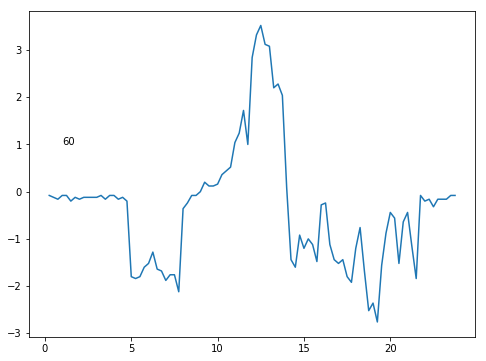

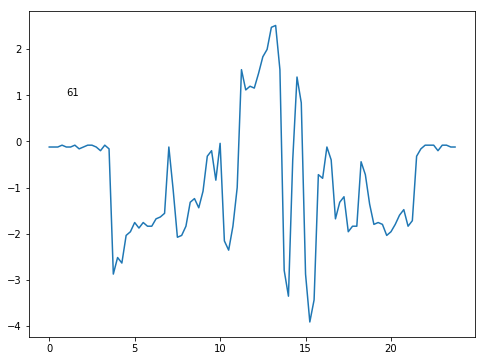

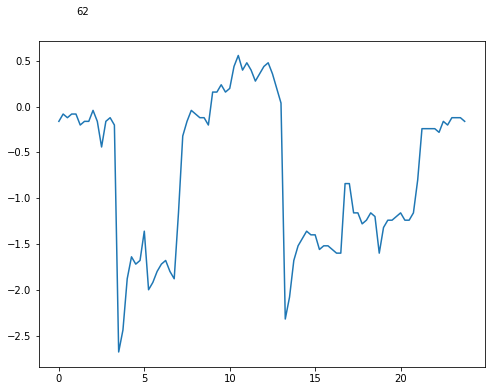

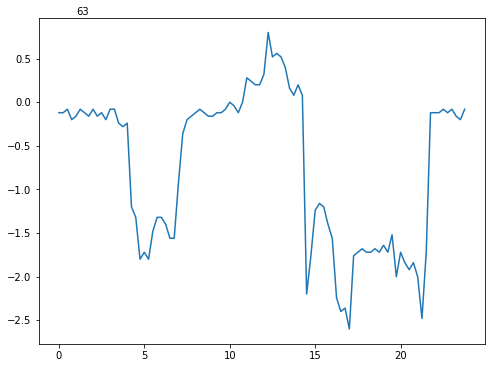

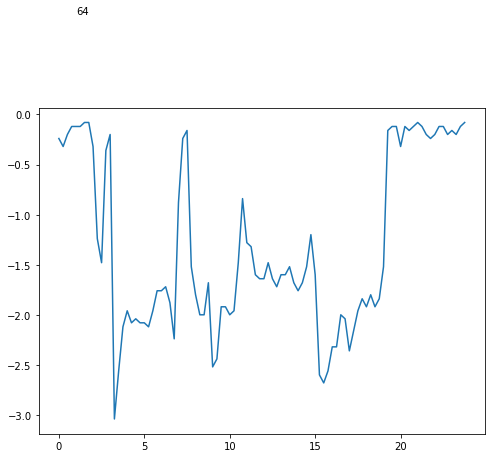

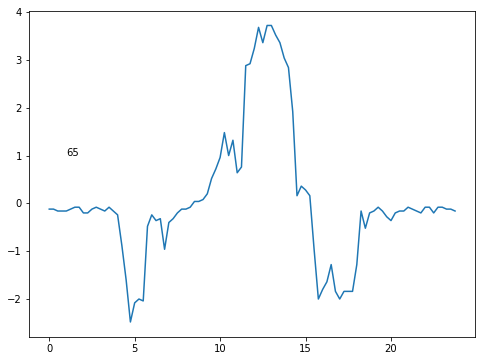

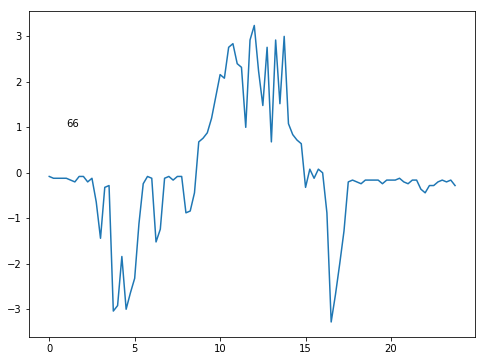

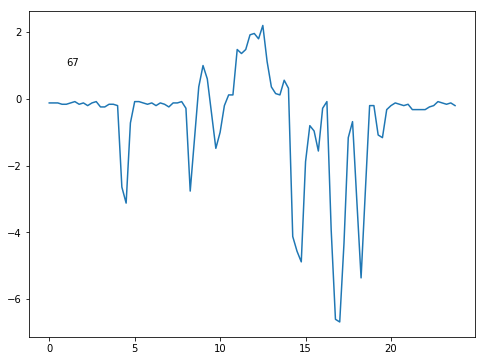

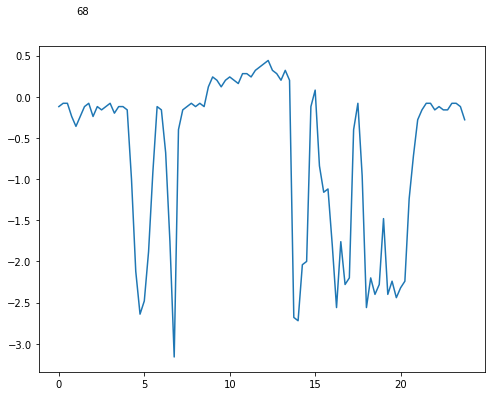

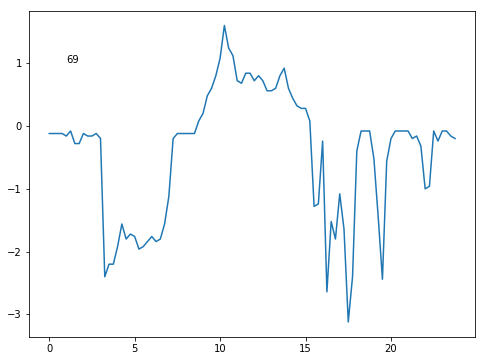

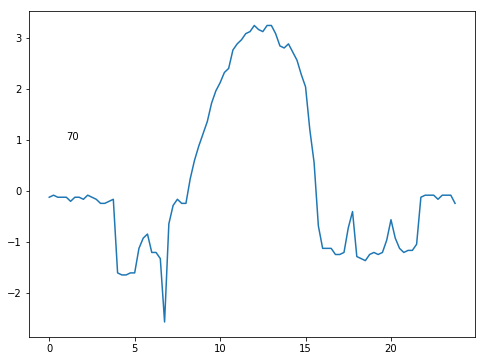

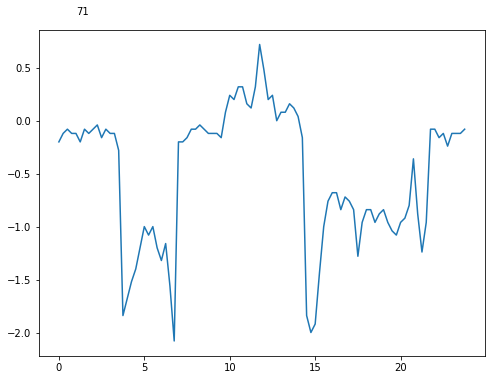

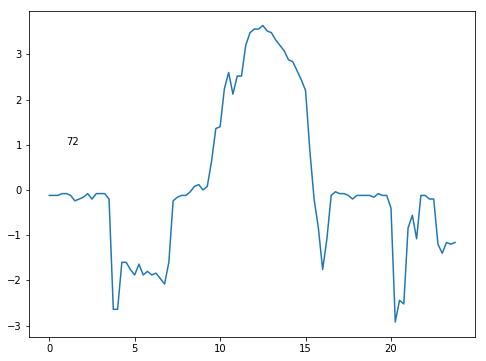

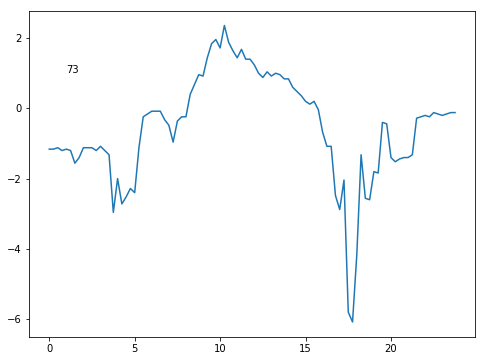

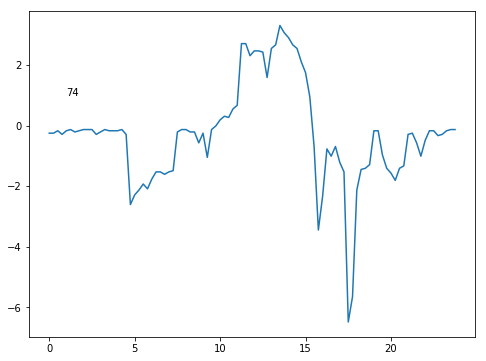

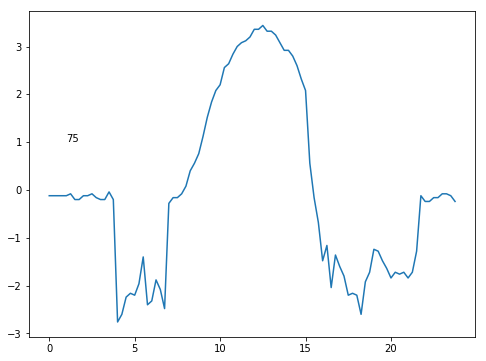

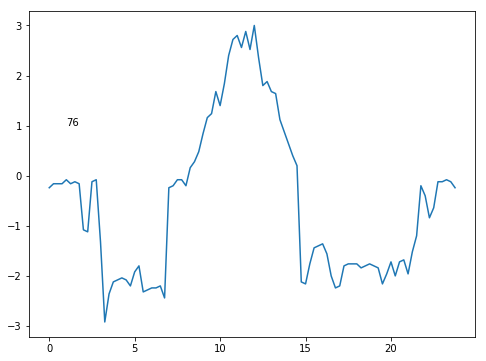

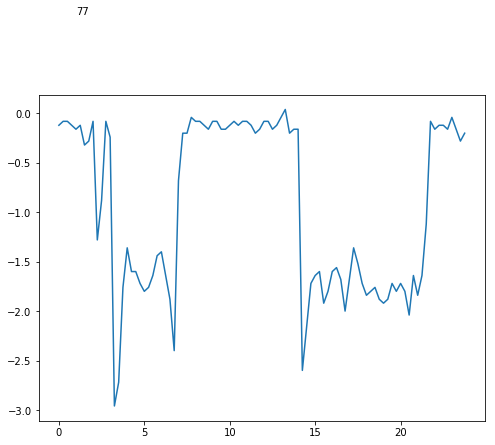

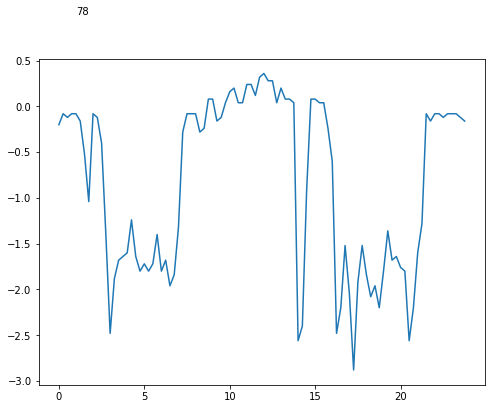

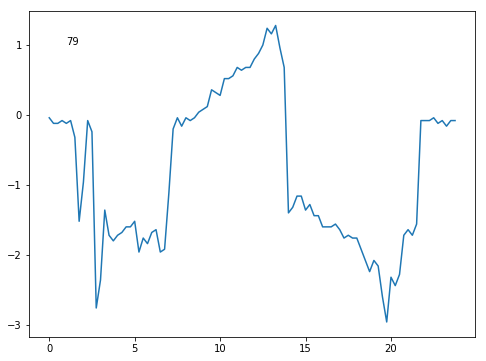

In [41]:
for d in np.arange(60, 80, 1):
    temp_df = raw_df[raw_df['daysincebeginning']==d]
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(temp_df['hourofday'], temp_df['net_power_kW'])
    ax.text(1,1,temp_df['daysincebeginning'].iloc[0])
    